# Learning from Big Data: Module 1 - Natural Language Processing

#### Session 1 - Getting familiar with Unsupervised Learning

# Introduction

This is a first, rather simple, script that has the goals of **(1)** getting you familiar with `Python` and `Juypyter Notebooks` (if you are not yet so) and **(2)** having you to black-box run very simple **Unsupervised Learning** task - a cluster analysis to group observations based on their *similarity*. For now, this is done by calling the `kmeans` functions from the `sklearn` library (for documentation, click [here](https://scikitlearn.org/stable/modules/generated/sklearn.cluster.KMeans.html)).

In **clustering**, our goal is to maximize within-cluster homogeneity while making the clusters as different as possible; in other words, we wish to find the set of clusters such that observations within each cluster are as similar to each other as possible, while the clusters (more specifically, their means) are as different from each other as possible. This is a classical example of **unsupervised learning**.

For now, I will not ask you to "open the black box" and explain how this specific unsupervised machine learning algorithm works. We will have time to explore the mechanics and details of specific NLP-appropriate supervised- and unsupervised- learning algorithms in the coming lectures and assignments.

# Loading Packages

Before starting, make sure you have all the required packages properly installed. Simply run the code block in the cell below.

In [39]:
# Packages required for the subsequent analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

# 1. Load and Prepare the Data

We will use the famous **Iris** dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set) because it is simple, appropriate for classification, and comes built-in `sklearn` (in `sklearn.datasets`). In the next tutorials, we will be loading the data ourselves, typically by reading the csv files (using the `read_csv()` function from the `pandas` package).

![Sepal and Petal](440px-Petal-sepal.jpg)

Figure: Sepal and Petal, source: [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The dataset has basically four variables: the length and width (in centimeters) of the flower sepal and petal. The goal is to use these variables to identify the species.

In [40]:
# Here, we load the Iris dataset from sklearn
data = load_iris()

# Printing the feature names
print(f"Feature names:\n {data.feature_names}\n")

# Printing the target names (of response variable)
print(f"Target names:\n {data.target_names}")

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
 ['setosa' 'versicolor' 'virginica']


### Extracting the features from the data

In [41]:
# Extracting the features from data
X = pd.DataFrame(data.data, columns=data.feature_names)

# Printing the dimensions:
print(f"There are a total of {X.shape[0]} observations (rows)")
print(f"There are a total of {X.shape[1]} features (columns) \n")

# First 5 rows of the features:
print(f"{X.head()}\n")

# Printing information:
#print(X.info())

There are a total of 150 observations (rows)
There are a total of 4 features (columns) 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2



### Extracting the target variable from the data

In [42]:
# Extracting the target from data ['setosa', 'versicolor', 'virginica'] -> [0, 1, 2]
y = pd.DataFrame(data.target, columns=["target"])

# Printing the number of observations:
print(f"There are a total of {y.shape[0]} observations (rows)\n")

# Printing the first 5 rows:
print(f"{y.head()}\n")

There are a total of 150 observations (rows)

   target
0       0
1       0
2       0
3       0
4       0



# 2. Fitting a K-Means clustering model to the training data

Now, we wil fit a clistering model using the `K-Means` algorithm. **Note** that this requires us to specify, a priori, the number of clusters we want the algorithm to produce. In this example, we set it equal to `3`.

In [43]:
# Setting random seed for reproducibility
np.random.seed(100)

# Defining the K-Means model
kmeans = KMeans(n_clusters=3, n_init=20)

# Fitting the k-means to the Iris data
kmeans.fit(X)

# Total within-cluster sum of squares (WCSS)
print(f"WCSS: {kmeans.inertia_}")

WCSS: 78.85144142614601


### Here are some summary statistics in the three identified clusters:

#### K-means clustering with 3 clusters of the sizes:

In [44]:
# Cluster assignments
labels = kmeans.labels_

# Counting the number of observations per cluster
unique, counts = np.unique(labels, return_counts=True)

# Printing the sizes of the clusters
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: has size {count}")

Cluster 0: has size 38
Cluster 1: has size 50
Cluster 2: has size 62


#### Cluster means:

In [45]:
# Cluster centers
centers = kmeans.cluster_centers_

center_df = pd.DataFrame(centers, columns=X.columns)
print(f"Cluster means:\n {center_df}")

Cluster means:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.850000          3.073684           5.742105          2.071053
1           5.006000          3.428000           1.462000          0.246000
2           5.901613          2.748387           4.393548          1.433871


# 3. Identify the cluster for each observation

In [46]:
# Cluster assignments
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# 4. How well does the classification do?

To check the performance of our algorithm, we compare the `clusters` against the `ground truth`, i.e., the actual species, which if found in the variable `species` in the dataset. **Note** that we have not used the variable `species` so far; we only use the dimension of the sepal and petal to create the clusters; now we will see how much hit and how much miss we got in this task.

In [47]:
# Getting the predicted labels
predicted = kmeans.labels_

**Note** that the numbering of the predicted clusters may not match the original labels in the Iris dataset, because k-means does not know anything about the original labels and just assigns numbers to the clusters it finds. We need to manually adjust the predicted labels to align them with the original labels, based on examining the confusion matrix and/or the centroids of the clusters.

In [48]:
# Manually create a mapping from predicted cluster to actual class
mapping = {0: 2, # mapping 0 to 2 (2 is virginica)
           1: 0, # mapping 1 to 0 (O is setosa)
           2: 1} # mapping 2 to 1 (1 is versicolor)

# Apply mapping to predicted labels
predicted_mapped = np.vectorize(mapping.get)(predicted)

# Generate confusion matrix
confus_matrix = confusion_matrix(y, predicted_mapped)

# Create a DataFrame for better visualization
confus_df = pd.DataFrame(confus_matrix, 
                       index=data.target_names, 
                       columns=[f'predicted {label}' for label in data.target_names])

print(confus_df)

            predicted setosa  predicted versicolor  predicted virginica
setosa                    50                     0                    0
versicolor                 0                    48                    2
virginica                  0                    14                   36


# 5. Let's look at the clusters

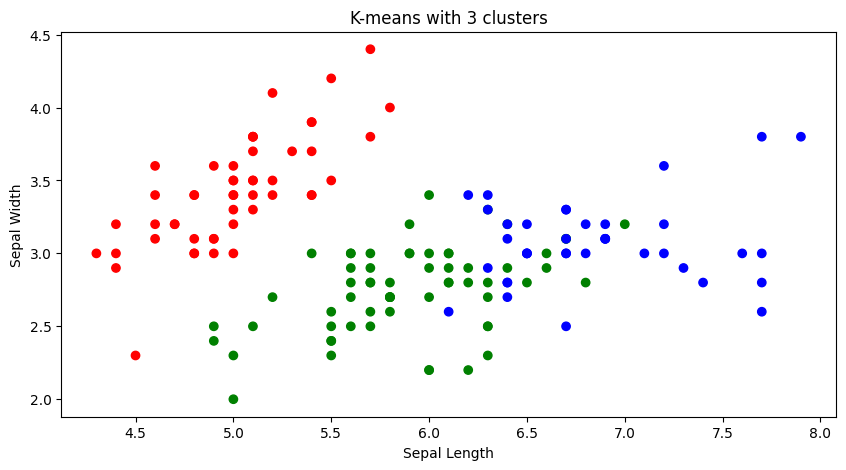

In [49]:
# Loading the Iris dataset again
iris_df = pd.DataFrame(X, columns=data.feature_names)

# Mapping cluster labels to colors
colors = []
for label in predicted_mapped:
    if label == 0:
        colors.append('red')
    elif label == 1:
        colors.append('green')
    elif label == 2:
        colors.append('blue')

# Create scatterplot
plt.figure(figsize=(10, 5))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=colors)
plt.title('K-means with 3 clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

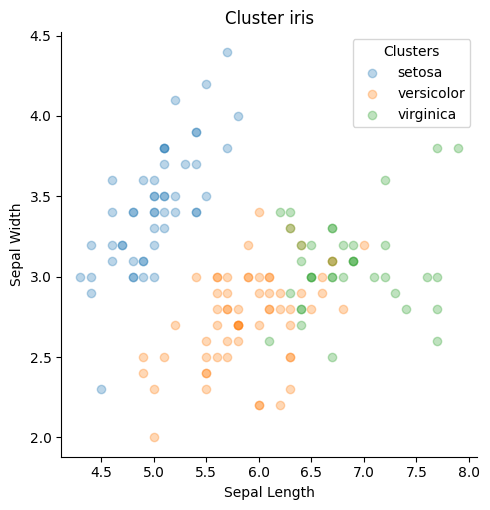

In [50]:
# Add predicted labels to dataframe
iris_df['predicted'] = predicted_mapped

# Define color mapping
color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Map predicted labels to colors
iris_df['color'] = iris_df['predicted'].map(color_map)

# Create lmplot
sns.lmplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='color', 
           fit_reg=False, legend=False, scatter_kws={'alpha':0.3}, ci=None)

plt.title('Cluster iris')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Clusters', loc='upper right', labels=['setosa', 'versicolor', 'virginica'])
plt.show()